<a href="https://colab.research.google.com/github/Zoro114/mne/blob/main/Forward_modelling_sensitivity_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista
import vtk

import mne
from mne.datasets import sample
from mne.source_space import compute_distance_to_sensors
from mne.source_estimate import SourceEstimate

In [6]:
data_path=sample.data_path()
fwd_fname=data_path /'MEG'/'sample'/'sample_audvis-meg-eeg-oct-6-fwd.fif'
subject_dir=data_path /'subjects'
fwd=mne.read_forward_solution(fwd_fname)
mne.convert_forward_solution(fwd,surf_ori=True,copy=False)



Reading forward solution from /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis-meg-eeg-oct-6-fwd.fif...
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523) not available
    Read MEG forward solution (7498 sources, 306 channels, free orientations)
    Desired named matrix (kind = 3523) not available
    Read EEG forward solution (7498 sources, 60 channels, free orientations)
    MEG and EEG forward solutions combined
    Source spaces transformed to the forward solution coordinate frame
    Average patch normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]


Good channels,"204 Gradiometers, 102 Magnetometers, 60 EEG"
Bad channels,"MEG 2443, EEG 053"
Source space,Surface with 7498 vertices
Source orientation,Free


In [7]:
leadfield=fwd['sol']['data']
leadfield.shape

(366, 22494)

In [8]:
leadfield

array([[ 1.58053836e-05, -9.90064304e-06,  1.54260835e-05, ...,
         1.09411614e-05, -2.15853103e-07,  8.78556081e-06],
       [-9.47824711e-06, -7.27370671e-06, -2.17550552e-05, ...,
        -2.80487715e-08,  1.03648356e-05,  1.33580541e-05],
       [-6.33912242e-07, -8.97403798e-08, -1.27939306e-06, ...,
        -1.83688602e-07, -7.65905899e-07, -8.93034527e-07],
       ...,
       [-2.80928105e+01, -7.03843268e+01,  1.35078581e+02, ...,
         6.85030886e+01,  5.15710104e+00,  1.40374339e+01],
       [-3.71579052e+01,  4.69769896e+00,  1.13472428e+02, ...,
         7.28021928e+01,  9.97999898e-01,  1.31009224e+01],
       [ 8.05492634e+00, -3.37808545e+01,  5.33388791e+01, ...,
         5.34279189e+01,  3.00641202e+00,  7.48051244e+00]])

In [9]:
grad_map=mne.sensitivity_map(fwd,ch_type='grad')
mag_map=mne.sensitivity_map(fwd,ch_type='mag')
eeg_map=mne.sensitivity_map(fwd,ch_type='eeg')


    204 out of 366 channels remain after picking
    102 out of 366 channels remain after picking
    60 out of 366 channels remain after picking
Adding average EEG reference projection.


In [10]:
picks_meg=mne.pick_types(fwd['info'],meg=True,eeg=False)
picks_eeg=mne.pick_types(fwd['info'],meg=False,eeg=True)

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'sensitivity'),
 Text(0.5, 1.0, 'Normal orientation sensitivity')]

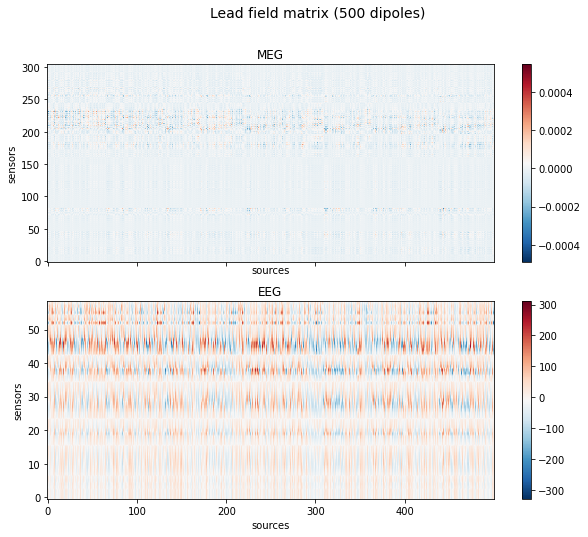

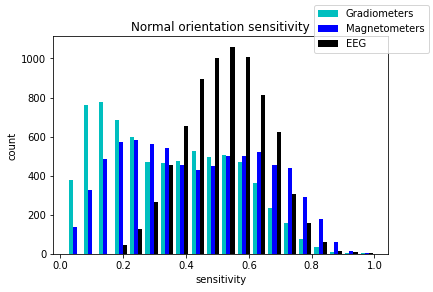

In [11]:
fig,axes=plt.subplots(2,1,figsize=(10,8),sharex=True)
fig.suptitle('Lead field matrix (500 dipoles)',fontsize=14)

for ax, picks, ch_type in zip(axes, [picks_meg, picks_eeg], ['meg', 'eeg']):
    im = ax.imshow(leadfield[picks, :500], origin='lower', aspect='auto',
                   cmap='RdBu_r')
    ax.set_title(ch_type.upper())
    ax.set_xlabel('sources')
    ax.set_ylabel('sensors')
    fig.colorbar(im, ax=ax)

fig2,ax=plt.subplots()
ax.hist([grad_map.data.ravel(), mag_map.data.ravel(), eeg_map.data.ravel()],
        bins=20, label=['Gradiometers', 'Magnetometers', 'EEG'],
        color=['c', 'b', 'k'])
fig2.legend()
ax.set(title='Normal orientation sensitivity',
       xlabel='sensitivity', ylabel='count')